# Importing Libraries & Data

In [1]:
# import libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [2]:
# establish path to project folder
path = r'C:\Users\BrianDavis\OneDrive - abetterchicago.org\Documents\Data Analysis\Achievement 5 (Python)\04-2023 Instacart Basket Analysis'

In [3]:
# import dataframe
df = pd.read_pickle(os.path.join(path,'02 Data','Prepared Data','orders_products_customers.pkl'))

# Manipulate Data

### Step 3 - You need to provide the Instacart senior stakeholders with descriptive findings about sales. Create a histogram of the “order_hour_of_day” column.

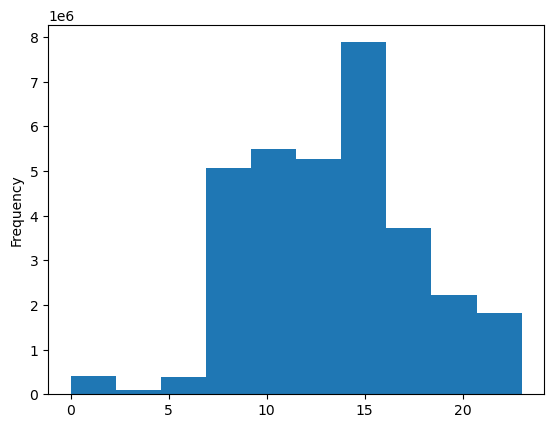

In [5]:
#create histogram
hist = df['order_hour_of_day'].plot.hist()

#### Observations: as the histogram shows, there are minimal orders placed in the early hours of the day, and starting around 7am they begin to rise, before peaking around 3pm, and slowly falling the rest of the day. 

### step 4 - The marketing team is curious about the distribution of orders among customers in terms of loyalty. Create a bar chart from the “loyalty_flag” column.

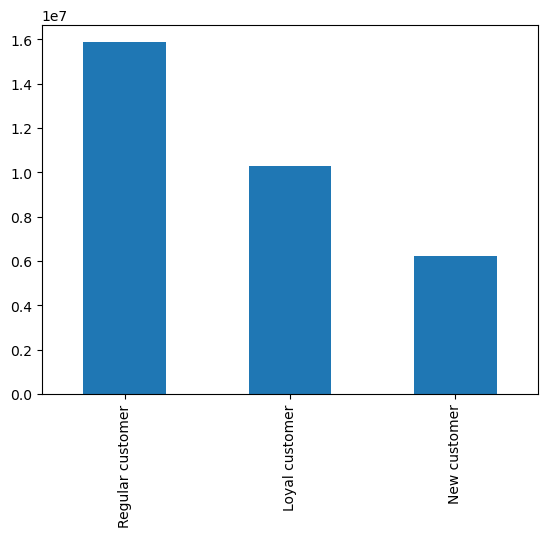

In [6]:
bar = df['loyalty_flag'].value_counts().plot.bar()

#### Observations: this bar chart shows that Reular Customers placed the most total orders (nearly 1.6M), followed by Loyal Customers (~1.0M), and New Customers (~600K)

### step 5 - Check whether there’s a difference in expenditure (the “prices” column) depending on the hour of the day. (Hint: To check this, you need to use an accurate sample for your line chart!)

In [8]:
#generate random numbers
np.random.seed(4)

In [15]:
#create new list using random numbers between 0 and 1; include only 70% of them (ie those under 0.7)
dev = np.random.rand(len(df)) <= 0.7

In [14]:
#store 30% of sample in small 
small = df[~dev]

In [16]:
#reduce sample to only necessary columns
df_2 = small[['order_hour_of_day', 'prices']]

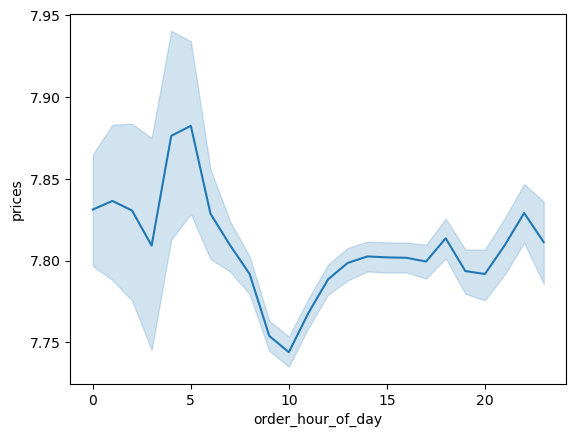

In [17]:
#create line chart of sample data 
line = sns.lineplot(data = df_2, x = 'order_hour_of_day', y = 'prices')

#### Observations: There is not a clear trend of price differences based on the hour of the day. While the chart above shows a surprising trend of elevated prices in the early hours of the day, the large confidence interval range during these hours suggest that there isn't an adequate number of orders to gauge prices. The data does show a pretty clear dip in prices for orders placed at 10am. 

### step 6 - Now that you have information about customers, you need to conduct some exploratory analysis of customer demographics to inform the targeted marketing campaigns. First, determine whether there’s a connection between age and family situation by creating a line chart exploring the connections between age and number of dependents.

In [21]:
#using small sample from above, limit dataframe to only necessary columns
df_customer = small[['Age', 'n_dependants']]

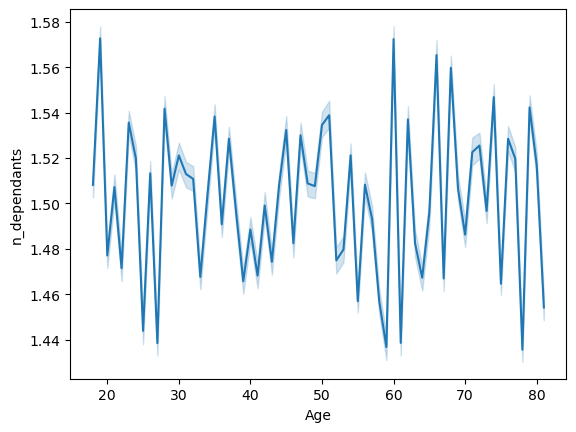

In [23]:
#create line chart of sample data 
line_2 = sns.lineplot(data = df_customer, x = 'Age', y = 'n_dependants')

#### Observations: there is no clear trend between a customer's age and the number of dependents they have. On average, across all ages, customers have between 1.44 and 1.58 dependents. While the number of dependents oscillates between years, there is no clear trend that the older someone is, the more (or less) dependents they have. 

### step 7 - You’ll also need to explore whether there’s a connection between age and spending power (income). To visualize this relationship, create a scatterplot using the sns.scatterplot() function.

In [25]:
#using small sample from above, limit dataframe to only necessary columns
df_customer_2 = small[['Age', 'income']]

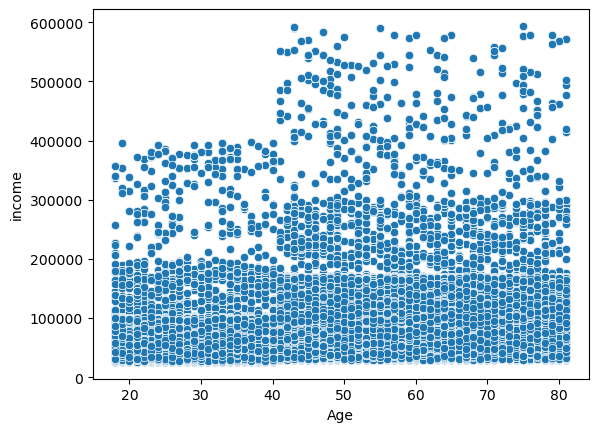

In [26]:
scatter = sns.scatterplot(data = df_customer_2, x = 'Age', y = 'income')

#### Observations: this scatterplot shows a pretty clear trend where people over the age of 40 have higher incomes. Not only do these individuals have incomes greater than 400,000 (as opposed to people under the age of 40 not having incomes of this level), but they also have a higher concentration of incomes between 200,000 and 300,000 as opposed to younger ages .

# Export Visualizations

In [27]:
#export histogram
hist.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'hist_hours_of_day.png'))

In [28]:
#export bar chart
bar.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar_loyalty.png'))

In [29]:
#export line chart
line.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'line_order_prices.png'))

In [30]:
#export second line chart
line_2.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'line_age_dependants.png'))

In [31]:
#export scatterplot
scatter.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'scatter_age_income.png'))